In [1]:
import os
import numpy as np
import pandas as pd
#from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# Otetaan evaluointidata käyättöön

In [2]:
#df_train_full = pd.read_csv("https://raw.githubusercontent.com/hetasks/loppuprojektiSyvaOppiminen/main/df_train_full.csv", sep=",", index_col = 0)

df_test_eval = pd.read_csv("https://raw.githubusercontent.com/hetasks/loppuprojektiSyvaOppiminen/main/df_test_eval.csv", sep=",", index_col = 0)

X_test_eval = df_test_eval.iloc[:,0:15].to_numpy()
y_test_eval = df_test_eval.iloc[:,15].to_numpy()
  


In [3]:
models_path = os.path.sep.join(['gs_dnn_20231019T0938'])
best_model_path = os.path.sep.join([models_path, '4_acc_90.54726.hdf5'])

In [4]:
model = load_model(best_model_path)

In [5]:
preds_all = model.predict(X_test_eval)
preds_labels = (preds_all > 0.5).astype(int)[:,0]

In [6]:
print(preds_all)

[[9.31539293e-03]
 [1.51183296e-04]
 [3.81127782e-02]
 [7.50843585e-02]
 [1.60079822e-01]
 [3.27321067e-02]
 [8.52230284e-03]
 [5.62876388e-02]
 [3.35359983e-02]
 [1.96982324e-01]
 [2.80516967e-02]
 [1.33435130e-01]
 [1.34323929e-02]
 [1.64005056e-01]
 [8.31667408e-02]
 [5.12458710e-03]
 [1.38473930e-02]
 [5.60779631e-01]
 [9.07618403e-01]
 [1.42570166e-02]
 [2.91559964e-01]
 [8.18538368e-01]
 [4.88564409e-02]
 [1.41929686e-01]
 [1.03742614e-01]
 [3.07058990e-02]
 [4.42534760e-02]
 [4.05581370e-02]
 [1.89358555e-02]
 [9.62065440e-03]
 [1.58327688e-02]
 [5.36908470e-02]
 [3.73581082e-01]
 [4.49477434e-01]
 [1.75272092e-01]
 [9.24996566e-04]
 [3.12699117e-02]
 [9.28909242e-01]
 [3.28409784e-02]
 [5.20411246e-02]
 [5.75325405e-03]
 [4.41878349e-01]
 [1.08895853e-01]
 [5.29489100e-01]
 [8.46325513e-03]
 [3.78294028e-02]
 [3.35295409e-01]
 [6.71984069e-03]
 [7.20495164e-01]
 [2.82274157e-01]
 [1.79928094e-02]
 [1.51421651e-01]
 [8.08803663e-02]
 [1.30415291e-01]
 [1.66305274e-01]
 [1.134593

In [7]:
print(preds_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:

tn, fp, fn, tp = confusion_matrix(y_test_eval, preds_labels).ravel()

acc, prec, rec, fscore = accuracy_score(y_test_eval, preds_labels), precision_score(y_test_eval, preds_labels), recall_score(y_test_eval, preds_labels), f1_score(y_test_eval, preds_labels)

title = f'Classification results: TP: {tp}, TN: {tn}, FN: {fn}, FP: {fp}, ACC: {acc:.5f}, PREC: {prec:.5f}, REC: {rec:.5f}, FSCORE: {fscore:.5f} \n'

print(title)

Classification results: TP: 28, TN: 336, FN: 33, FP: 5, ACC: 0.90547, PREC: 0.84848, REC: 0.45902, FSCORE: 0.59574 



In [9]:
ths, fscores = [], []
for th in np.linspace(0.01, 1, num=1000, endpoint=False):
    preds_th = (model.predict(X_test_eval) > th).astype(int)[:,0]
    ths.append(th)
    fscores.append(f1_score(y_test_eval, preds_th))

Text(0.5, 1.0, 'Max f1_score: 0.64000')

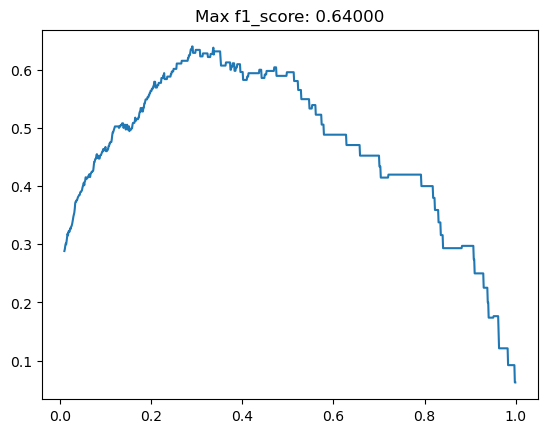

In [10]:
plt.plot(ths, fscores)
plt.title(f"Max f1_score: {max(fscores):.5f}")

# Valitaan 0.75 lopulliseksi kynnysarvoksi

print(ths[np.where(np.array(fscores) == 1)[0][0]])
print(ths[np.where(np.array(fscores) == 1)[0][-1]])

In [13]:
preds_tn = {i: preds_all[i][0] for i, (gt, pred_all) in enumerate(zip(y_test_eval, preds_labels)) if pred_all == 0 and gt == 0}
preds_tp = {i: preds_all[i][0] for i, (gt, pred_all) in enumerate(zip(y_test_eval, preds_labels)) if pred_all == 1 and gt == 1}

In [14]:
X_test_eval_tn = X_test_eval[list(preds_tn.keys())]
X_test_eval_tp = X_test_eval[list(preds_tp.keys())]

preds_tn_anchorwise = [X_test_eval_tn.reshape(-1, X_test_eval_tn.shape[-1])[:,i] for i in range(X_test_eval_tn.shape[-1])]
preds_tp_anchorwise = [X_test_eval_tp.reshape(-1, X_test_eval_tp.shape[-1])[:,i] for i in range(X_test_eval_tp.shape[-1])]

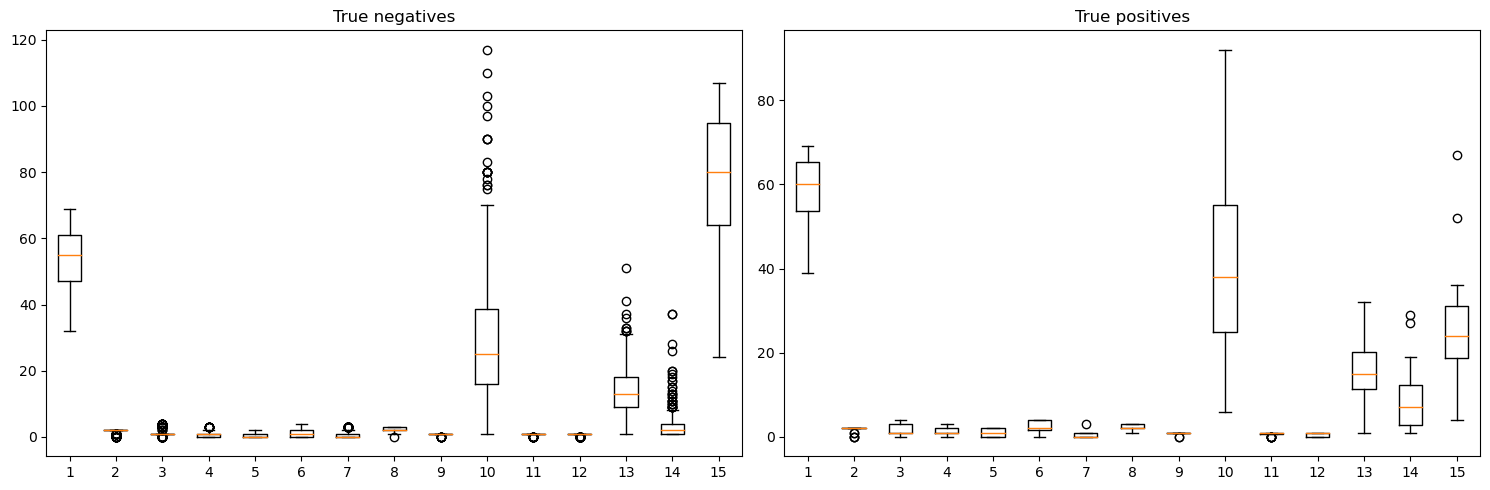

In [15]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(preds_tn_anchorwise);
ax1.set_title('True negatives');
    
ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(preds_tp_anchorwise);
ax2.set_title('True positives');
fig.tight_layout()

### Lopulliset ennustukset testidatalla

In [16]:


df_test_unseen = pd.read_csv("https://raw.githubusercontent.com/hetasks/loppuprojektiSyvaOppiminen/main/df_test_unseen.csv", sep=",", index_col = 0)


X_test_unseen = df_test_unseen.iloc[:,0:15].to_numpy()
y_test_unseen = df_test_unseen.iloc[:,15].to_numpy()
    
preds = model.predict(X_test_unseen)
preds_labels = (preds > 0.75).astype(int)[:,0]
   
tn, fp, fn, tp = confusion_matrix(y_test_unseen, preds_labels).ravel()
acc, prec, rec, fscore = accuracy_score(y_test_unseen, preds_labels), precision_score(y_test_unseen, preds_labels), recall_score(y_test_unseen, preds_labels), f1_score(y_test_unseen, preds_labels)
   
title = f'Classification results: TP: {tp}, TN: {tn}, FN: {fn}, FP: {fp} \\n ACC: {acc:.5f}, PREC: {prec:.5f}, REC: {rec:.5f}, FSCORE: {fscore:.5f} '
print(title)

Classification results: TP: 14, TN: 338, FN: 48, FP: 3 \n ACC: 0.87345, PREC: 0.82353, REC: 0.22581, FSCORE: 0.35443 


In [17]:
ths, fscores = [], []
for th in np.linspace(0.01, 1, num=1000, endpoint=False):
        preds_th = (model.predict(X_test_unseen) > th).astype(int)[:,0]
        ths.append(th)
        fscores.append(f1_score(y_test_unseen, preds_th))

Text(0.5, 1.0, 'Max f1_score: 0.61261')

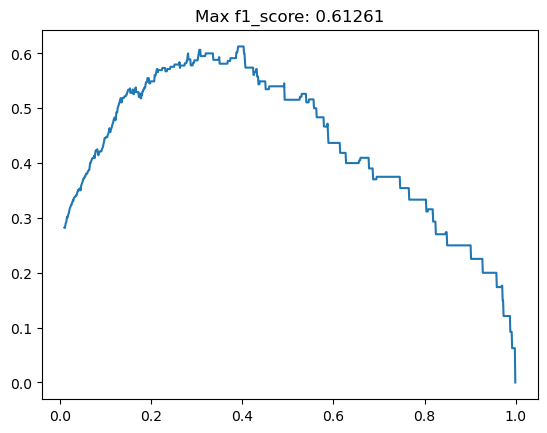

In [18]:
plt.plot(ths, fscores)
plt.title(f"Max f1_score: {max(fscores):.5f}")

In [24]:
accs_all = []
for f in os.listdir(models_path):
        if '4_' in f:
            curr_model = load_model(os.path.sep.join([models_path, f]))
            curr_preds = curr_model.predict(X_test_unseen)[:,0]
            curr_acc = accuracy_score(y_test_unseen, (curr_preds > 0.75).astype(int))
            accs_all.append(curr_acc)
            curr_preds_labels = (curr_preds > 0.5).astype(int)
            print(f, f1_score(y_test_unseen, curr_preds_labels), curr_acc)

4_acc_90.54726.hdf5 0.5154639175257731 0.8734491315136477


In [23]:
preds_ensemble = (np.average(preds_all, axis=0, weights=accs_all) > 0.5).astype(int)
print(f1_score(y_test_unseen, preds_ensemble), accuracy_score(y_test_unseen, preds_ensemble))

ValueError: Length of weights not compatible with specified axis.

In [21]:
preds_tn = {i: preds[i][0] for i, (gt, pred) in enumerate(zip(y_test_unseen, preds_labels)) if pred == 0 and gt == 0}
preds_fp = {i: preds[i][0] for i, (gt, pred) in enumerate(zip(y_test_unseen, preds_labels)) if pred == 1 and gt == 0}
preds_tp = {i: preds[i][0] for i, (gt, pred) in enumerate(zip(y_test_unseen, preds_labels)) if pred == 1 and gt == 1}
preds_fn = {i: preds[i][0] for i, (gt, pred) in enumerate(zip(y_test_unseen, preds_labels)) if pred == 0 and gt == 1}

In [26]:
X_test_unseen_tn = X_test_unseen[list(preds_tn.keys())]
X_test_unseen_tp = X_test_unseen[list(preds_tp.keys())]
X_test_unseen_fn = X_test_unseen[list(preds_fn.keys())]
X_test_unseen_fp = X_test_unseen[list(preds_fp.keys())]

preds_tn_anchorwise = [X_test_unseen_tn.reshape(-1, X_test_unseen_tn.shape[-1])[:,i] for i in range(X_test_unseen_tn.shape[-1])]
preds_tp_anchorwise = [X_test_unseen_tp.reshape(-1, X_test_unseen_tp.shape[-1])[:,i] for i in range(X_test_unseen_tp.shape[-1])]
preds_fn_anchorwise = [X_test_unseen_fn.reshape(-1, X_test_unseen_fp.shape[-1])[:,i] for i in range(X_test_unseen_fn.shape[-1])]
preds_fp_anchorwise = [X_test_unseen_fp.reshape(-1, X_test_unseen_fn.shape[-1])[:,i] for i in range(X_test_unseen_fp.shape[-1])]

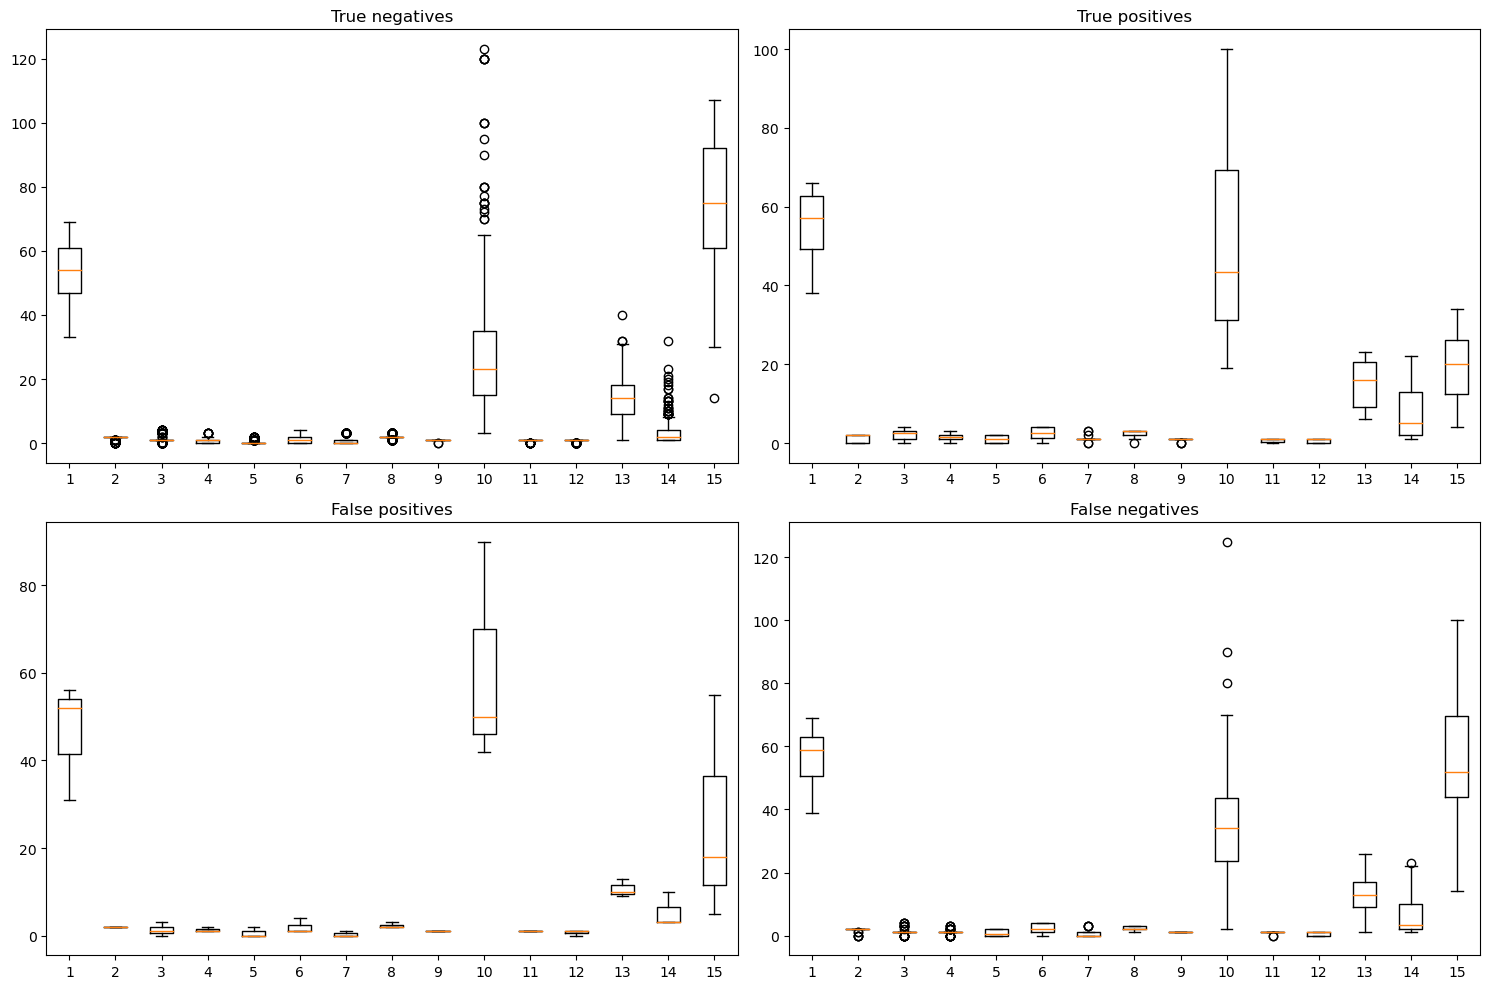

In [27]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.boxplot(preds_tn_anchorwise);
ax1.set_title('True negatives');

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot(preds_tp_anchorwise);
ax2.set_title('True positives');
  
ax3 = fig.add_subplot(2,2,3)
ax3.boxplot(preds_fp_anchorwise);
ax3.set_title('False positives');

ax4 = fig.add_subplot(2,2,4)
ax4.boxplot(preds_fn_anchorwise);
ax4.set_title('False negatives');
fig.tight_layout()

In [30]:
from itertools import chain, combinations
 
def powerset(s):
        if not isinstance(s, list):
            s = list(s)
        return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
    
        files = [f for f in os.listdir(models_path) if '2_' in f]

        print(len(list(powerset(files))), len(list(powerset(files[:10]))))